<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.051152,43.402413,-1737.476912,-1611.023347,1212.483123,-2823.506470
1,0.0,1.0,43.049458,36.891574,796.837187,886.778219,-923.751138,1810.529358
2,0.0,2.0,65.008350,92.773092,11270.145604,11437.927046,1814.184109,9623.742937
3,0.0,3.0,70.975806,81.908903,5491.063194,5653.947904,1959.734667,3694.213237
4,0.0,4.0,48.679083,68.434967,-3155.483764,-3028.369714,173.732102,-3202.101816
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.669043,35.172637,-543.784092,-422.942412,1114.062994,-1537.005406
59996,999.0,56.0,48.724580,94.793393,8804.126564,8957.644538,-2290.455109,11248.099647
59997,999.0,57.0,37.371578,42.682844,-3604.455621,-3514.401199,-18.843044,-3495.558155
59998,999.0,58.0,62.447894,58.886590,1928.344019,2059.678504,-290.583449,2350.261953


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.051152,43.402413,-1737.476912,-1611.023347,1212.483123,-2823.506470
1,0.0,1.0,43.049458,36.891574,796.837187,886.778219,-923.751138,1810.529358
2,0.0,2.0,65.008350,92.773092,11270.145604,11437.927046,1814.184109,9623.742937
3,0.0,3.0,70.975806,81.908903,5491.063194,5653.947904,1959.734667,3694.213237
4,0.0,4.0,48.679083,68.434967,-3155.483764,-3028.369714,173.732102,-3202.101816
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.669043,35.172637,-543.784092,-422.942412,1114.062994,-1537.005406
59996,999.0,56.0,48.724580,94.793393,8804.126564,8957.644538,-2290.455109,11248.099647
59997,999.0,57.0,37.371578,42.682844,-3604.455621,-3514.401199,-18.843044,-3495.558155
59998,999.0,58.0,62.447894,58.886590,1928.344019,2059.678504,-290.583449,2350.261953


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    73.051152  43.402413  -1737.476912  -1611.023347  1212.483123   
      1.0    43.049458  36.891574    796.837187    886.778219  -923.751138   
      2.0    65.008350  92.773092  11270.145604  11437.927046  1814.184109   
      3.0    70.975806  81.908903   5491.063194   5653.947904  1959.734667   
      4.0    48.679083  68.434967  -3155.483764  -3028.369714   173.732102   
...                ...        ...           ...           ...          ...   
999.0 55.0   75.669043  35.172637   -543.784092   -422.942412  1114.062994   
      56.0   48.724580  94.793393   8804.126564   8957.644538 -2290.455109   
      57.0   37.371578  42.682844  -3604.455621  -3514.401199   -18.843044   
      58.0   62.447894  58.886590   1928.344019   2059.678504  -290.583449   
      59.0   26.092817  38.523934    940.307526   1014.924277   -46.779176   

                    e_hat  
rep   index                
0.0   0.0    -2823.506470  
      1.0     1810.529358  
      2.0     9623.742937  
      3.0     3694.213237  
      4.0    -3202.101816  
...                   ...  
999.0 55.0   -1537.005406  
      56.0   11248.099647  
      57.0   -3495.558155  
      58.0    2350.261953  
      59.0    1061.703453  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    73.051152  43.402413  -1737.476912  -1611.023347  1212.483123   
      1.0    43.049458  36.891574    796.837187    886.778219  -923.751138   
      2.0    65.008350  92.773092  11270.145604  11437.927046  1814.184109   
      3.0    70.975806  81.908903   5491.063194   5653.947904  1959.734667   
      4.0    48.679083  68.434967  -3155.483764  -3028.369714   173.732102   
...                ...        ...           ...           ...          ...   
999.0 55.0   75.669043  35.172637   -543.784092   -422.942412  1114.062994   
      56.0   48.724580  94.793393   8804.126564   8957.644538 -2290.455109   
      57.0   37.371578  42.682844  -3604.455621  -3514.401199   -18.843044   
      58.0   62.447894  58.886590   1928.344019   2059.678504  -290.583449   
      59.0   26.092817  38.523934    940.307526   1014.924277   -46.779176   

                    e_hat  
rep   index                
0.0   0.0    -2823.506470  
      1.0     1810.529358  
      2.0     9623.742937  
      3.0     3694.213237  
      4.0    -3202.101816  
...                   ...  
999.0 55.0   -1537.005406  
      56.0   11248.099647  
      57.0   -3495.558155  
      58.0    2350.261953  
      59.0    1061.703453  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.051152,43.402413,-1737.476912,-1611.023347,1212.483123,-2823.506470
1,0.0,1.0,43.049458,36.891574,796.837187,886.778219,-923.751138,1810.529358
2,0.0,2.0,65.008350,92.773092,11270.145604,11437.927046,1814.184109,9623.742937
3,0.0,3.0,70.975806,81.908903,5491.063194,5653.947904,1959.734667,3694.213237
4,0.0,4.0,48.679083,68.434967,-3155.483764,-3028.369714,173.732102,-3202.101816
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.669043,35.172637,-543.784092,-422.942412,1114.062994,-1537.005406
59996,999.0,56.0,48.724580,94.793393,8804.126564,8957.644538,-2290.455109,11248.099647
59997,999.0,57.0,37.371578,42.682844,-3604.455621,-3514.401199,-18.843044,-3495.558155
59998,999.0,58.0,62.447894,58.886590,1928.344019,2059.678504,-290.583449,2350.261953


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    73.051152  43.402413  -1737.476912  -1611.023347  1212.483123   
      1.0    43.049458  36.891574    796.837187    886.778219  -923.751138   
      2.0    65.008350  92.773092  11270.145604  11437.927046  1814.184109   
      3.0    70.975806  81.908903   5491.063194   5653.947904  1959.734667   
      4.0    48.679083  68.434967  -3155.483764  -3028.369714   173.732102   
...                ...        ...           ...           ...          ...   
999.0 55.0   75.669043  35.172637   -543.784092   -422.942412  1114.062994   
      56.0   48.724580  94.793393   8804.126564   8957.644538 -2290.455109   
      57.0   37.371578  42.682844  -3604.455621  -3514.401199   -18.843044   
      58.0   62.447894  58.886590   1928.344019   2059.678504  -290.583449   
      59.0   26.092817  38.523934    940.307526   1014.924277   -46.779176   

                    e_hat  
rep   index                
0.0   0.0    -2823.506470  
      1.0     1810.529358  
      2.0     9623.742937  
      3.0     3694.213237  
      4.0    -3202.101816  
...                   ...  
999.0 55.0   -1537.005406  
      56.0   11248.099647  
      57.0   -3495.558155  
      58.0    2350.261953  
      59.0    1061.703453  

[60000 rows x 6 columns]

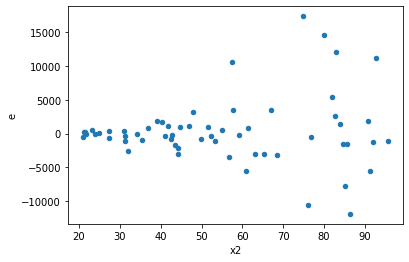

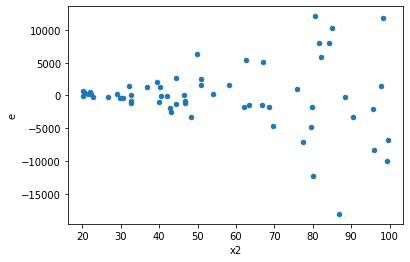

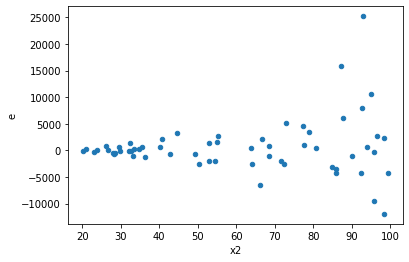

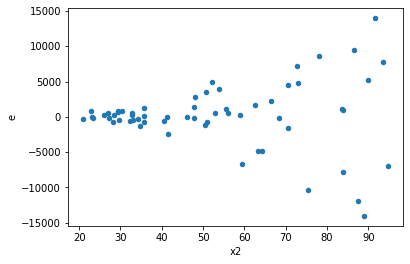

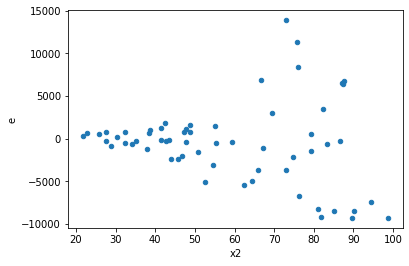

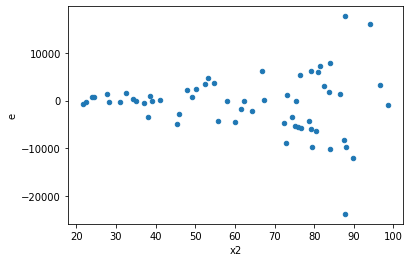

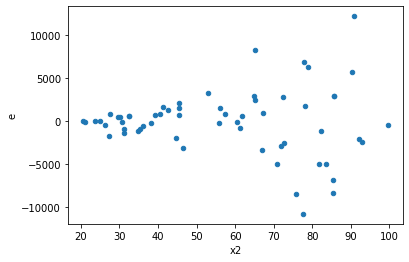

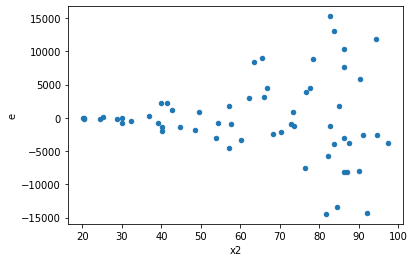

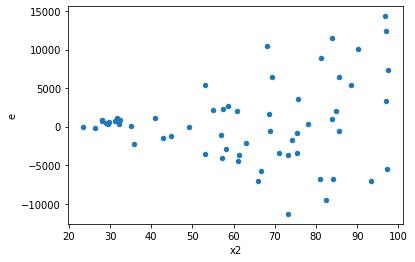

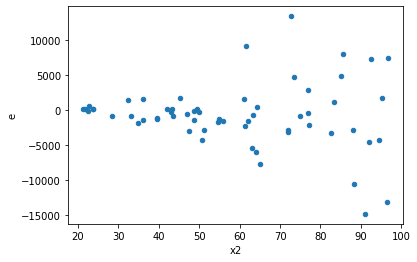

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,26170070.74253953,1043445041.6777518,1189548.6701154332,47429320.076261446,39.87169358245672,1.0578204978628492e-12,0.9999999999994711,5.289102489314246e-13,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,22300892.976422753,1358183840.7190576,1013676.9534737616,61735629.123593524,60.90266619166213,1.199040866595169e-14,0.999999999999994,5.995204332975845e-15,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,21003381.32759437,1430463845.7409792,954699.1512542896,65021083.89731724,68.10635980129672,3.552713678800501e-15,0.9999999999999982,1.7763568394002505e-15,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,8454528.681305848,1177637309.678655,384296.7582411749,53528968.62175704,139.29071082135857,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,24842692.922362335,879742931.0877862,1129213.3146528334,39988315.049444824,35.41254298948722,3.664846204287642e-12,0.9999999999981676,1.832423102143821e-12,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,124528590.53319639,1980706963.1204095,5660390.4787816545,90032134.68729134,15.905640260116808,1.2544550287429956e-08,0.9999999937277249,6.272275143714978e-09,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,19490542.85366176,658502916.693685,885933.7660755346,29931950.758803867,33.785765826936405,5.986322548778844e-12,0.9999999999970068,2.993161274389422e-12,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,49158766.002570875,1634543172.4079545,2234489.3637532215,74297416.9276343,33.25028891739211,7.070344310022847e-12,0.9999999999964648,3.5351721550114235e-12,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,88645474.48191927,955169302.5892357,4029339.749178149,43416786.4813289,10.775161486490306,5.210145033185398e-07,0.9999997394927483,2.605072516592699e-07,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,26170070.74253953,1043445041.6777518,1189548.6701154332,47429320.076261446,39.87169358245672,1.0578204978628492e-12,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,22300892.976422753,1358183840.7190576,1013676.9534737616,61735629.123593524,60.90266619166213,1.199040866595169e-14,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,21003381.32759437,1430463845.7409792,954699.1512542896,65021083.89731724,68.10635980129672,3.552713678800501e-15,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,8454528.681305848,1177637309.678655,384296.7582411749,53528968.62175704,139.29071082135857,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,24842692.922362335,879742931.0877862,1129213.3146528334,39988315.049444824,35.41254298948722,3.664846204287642e-12,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,124528590.53319639,1980706963.1204095,5660390.4787816545,90032134.68729134,15.905640260116808,1.2544550287429956e-08,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,19490542.85366176,658502916.693685,885933.7660755346,29931950.758803867,33.785765826936405,5.986322548778844e-12,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,49158766.002570875,1634543172.4079545,2234489.3637532215,74297416.9276343,33.25028891739211,7.070344310022847e-12,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,88645474.48191927,955169302.5892357,4029339.749178149,43416786.4813289,10.775161486490306,5.210145033185398e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64